# The misanthropes are coming

Full problem [here](http://fivethirtyeight.com/features/can-you-solve-the-puzzle-of-your-misanthropic-neighbors/)

A naive approach would be to assume that one and two empty houses between occupied houses is equally likely and thus the expected quotient is

$$
\left( \frac{1}{2} + \frac{1}{3} \right) / 2 = \frac{5}{12}.
$$

It turns out that this is not the case, because it's slightly more likely that occupied houses be separated by one empty house.

## Solution

Consider a stretch of $n-1$ unoccupied houses surrounded by occupied houses, like this:

```
|X|1|2|3|4|5|6|7|...|n-1|X|
```

let $\bar{s}_n$ be the expected number of houses that will be occupied following our rule including the occupied house at the end.

When a new misantrope moves in, they pick a house $k$ between $2$ and $n-2$ at random. This act will essentially split the stretch into two smaller stretches of unoccupied houses of lengths $k$ and $N-k$, respectively.

```
|X|1|...|k-1|X|k+1|...|n-1|X|
```

From this observation we can make a recursive formula for $\bar{s}_n$:

$$
\bar{s}_n = \frac{1}{n-3} \sum_{k=2}^{n-1} \left( \bar{s}_{k-1} + \bar{s}_{n-k} \right),
$$

where $\bar{s}_2 = \bar{s}_3 = 1$. This can be simplified to

$$
\bar{s}_n = \frac{2}{n-3} \sum_{k=1}^{n-2} \bar{s}_{k}.
$$

Elliminating the sums we get

$$
\bar{s}_n = \frac{n-4}{n-3}\bar{s}_{n-1} + \frac{2}{n-3}\bar{s}_{n-2}.
$$

Let's see what $\frac{\bar{s}_n}{n}$ converges to.

converges to:
0.432332358382


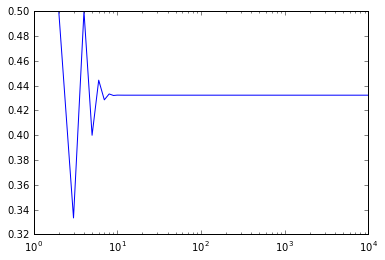

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

s = np.zeros(10001)
s[2] = 1
s[3] = 1
for n in np.arange(4, 10001):
    s[n] = (n-4.0)/(n-3.0)*s[n-1] + 2.0/(n-3.0)*s[n-2]

plt.semilogx(np.arange(2, 10001), s[2:]/np.arange(2, 10001))
print('converges to:')
print(s[10000]/10000)

It seems that it rapidly converges towards $0.432332358382...$. What number could this be?

My conjecture is that the exact solution is

$$
\frac{1}{2} - \frac{1}{2e},
$$

but I have not been able to prove it yet.